In [ ]:
!pip install python-Levenshtein

     |████████████████████████████████| 50 kB 2.3 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149859 sha256=42051c695d825c5980351920d665832aee4603e3af065966afbb697a49837fb8
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [ ]:
!pip install xgboost

**Import**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

#Model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Mounted at /content/drive


In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/EMSE 6574 Project/df_dummied.csv')
df = pd.read_csv('/content/drive/My Drive/Project_for_EMSE6574/Code Collection/Data/df_dummied.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,price,year,manufacturer,model,odometer,manu_model,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_UNKNOWN,cylinders_other,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_UNKNOWN,drive_fwd,drive_rwd,size_compact,size_full-size,size_mid-size,...,model_class_honda accord,model_class_honda civic,model_class_honda cr-v,model_class_honda odyssey,model_class_hyundai,model_class_hyundai sonata,model_class_infiniti,model_class_jaguar,model_class_jeep,model_class_jeep grand cherokee,model_class_jeep wrangler,model_class_kia,model_class_lexus,model_class_lincoln,model_class_mazda,model_class_mercedes-benz,model_class_mercury,model_class_mini,model_class_mitsubishi,model_class_nissan,model_class_nissan altima,model_class_pontiac,model_class_porsche,model_class_ram,model_class_ram 1500,model_class_ram 2500,model_class_rover,model_class_saturn,model_class_subaru,model_class_subaru forester,model_class_subaru outback,model_class_tesla,model_class_toyota,model_class_toyota camry,model_class_toyota corolla,model_class_toyota prius,model_class_toyota rav4,model_class_toyota tacoma,model_class_volkswagen,model_class_volvo
0,33590,2014,gmc,sierra 1500 crew cab slt,57923.0,gmc sierra 1500 crew cab slt,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,22590,2010,chevrolet,silverado 1500,71229.0,chevrolet silverado 1500,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39590,2020,chevrolet,silverado 1500 crew,19160.0,chevrolet silverado 1500 crew,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30990,2017,toyota,tundra double cab sr,41124.0,toyota tundra double cab sr,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,15000,2013,ford,f-150 xlt,128000.0,ford f-150 xlt,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#reduce the scale of odometer to prevent from dominating the prediction model
df["odometer"] = np.sqrt(preprocessing.minmax_scale(df["odometer"]))
df.head()

,price,year,manufacturer,model,odometer,manu_model,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_UNKNOWN,cylinders_other,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_UNKNOWN,drive_fwd,drive_rwd,size_compact,size_full-size,size_mid-size,...,model_class_honda accord,model_class_honda civic,model_class_honda cr-v,model_class_honda odyssey,model_class_hyundai,model_class_hyundai sonata,model_class_infiniti,model_class_jaguar,model_class_jeep,model_class_jeep grand cherokee,model_class_jeep wrangler,model_class_kia,model_class_lexus,model_class_lincoln,model_class_mazda,model_class_mercedes-benz,model_class_mercury,model_class_mini,model_class_mitsubishi,model_class_nissan,model_class_nissan altima,model_class_pontiac,model_class_porsche,model_class_ram,model_class_ram 1500,model_class_ram 2500,model_class_rover,model_class_saturn,model_class_subaru,model_class_subaru forester,model_class_subaru outback,model_class_tesla,model_class_toyota,model_class_toyota camry,model_class_toyota corolla,model_class_toyota prius,model_class_toyota rav4,model_class_toyota tacoma,model_class_volkswagen,model_class_volvo
0,33590,2014,gmc,sierra 1500 crew cab slt,0.380536,gmc sierra 1500 crew cab slt,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,22590,2010,chevrolet,silverado 1500,0.421987,chevrolet silverado 1500,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39590,2020,chevrolet,silverado 1500 crew,0.218861,chevrolet silverado 1500 crew,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30990,2017,toyota,tundra double cab sr,0.320640,toyota tundra double cab sr,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,15000,2013,ford,f-150 xlt,0.565686,ford f-150 xlt,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **1. Train Test Split**

In [ ]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'odometer', 'manu_model',
       'condition_excellent', 'condition_fair', 'condition_good',
       'condition_like new',
       ...
       'model_class_subaru outback', 'model_class_tesla', 'model_class_toyota',
       'model_class_toyota camry', 'model_class_toyota corolla',
       'model_class_toyota prius', 'model_class_toyota rav4',
       'model_class_toyota tacoma', 'model_class_volkswagen',
       'model_class_volvo'],
      dtype='object', length=185)

In [ ]:
X = df.drop(['price','manufacturer', 'model', 'manu_model'],axis=1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=666)
#view number of training and testing data
print('Our training prediction variable contains :',len(y_train) ,'rows')
print('Our training independent variable contains :',len(X_train) ,'rows')
print('Our testing prediction variable contains :',len(y_test) ,'rows')
print('Our testing independent variable contains :',len(X_test) ,'rows')

Our training prediction variable contains : 174174 rows
Our training independent variable contains : 174174 rows
Our testing prediction variable contains : 85788 rows
Our testing independent variable contains : 85788 rows


# **2. Define a function for output statistcs**

In [ ]:
def reg_metrics(prediction_model, X_train, X_test, y_train, y_test):
    pred = prediction_model.predict(X_test)
    train_pred = prediction_model.predict(X_train)
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
    RMSE_test =  np.sqrt(metrics.mean_squared_error(y_test, pred))
    R2_train = np.round(prediction_model.score(X_train, y_train),4)
    R2_test = np.round(prediction_model.score(X_test, y_test),4)
    print('RMSE on train data:', RMSE_train)
    print('RMSE on test data:', RMSE_test)
    print('R-square on train data:', R2_train)
    print('R-square on test data:', R2_test)
    return (RMSE_train,RMSE_test, R2_train, R2_test)

In [ ]:
# Create a dataframe to summarize accuracies
prediction_model_list = ['Linear Regression','Decision Tree','Random Forest Regression','XGBoost Regression']
acc_cols = ['RMSE_train','RMSE_test','R2_train','R2_test']
accuracy = pd.DataFrame(columns=acc_cols, index=prediction_model_list)

# **3. Model**



## **3.1 Linear Model - Baseline Model**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Price after Logarithm Transformation')

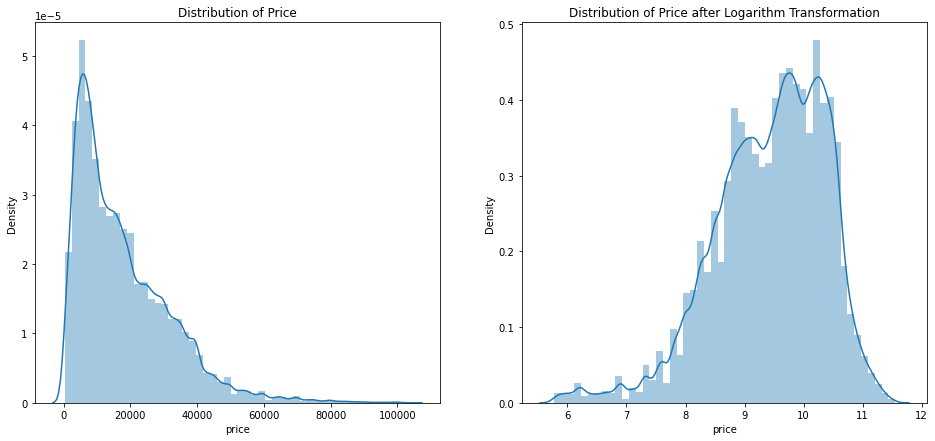

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.distplot(df['price'],kde=True,bins=50)
plt.title('Distribution of Price')
plt.subplot(1,2,2)
sns.distplot(np.log(df['price']),kde=True,bins=50)
plt.title('Distribution of Price after Logarithm Transformation')

We will use price after logarithm transformation for LiearRegression.

In [ ]:
y_log = np.log(df['price'])
X_train, X_test, y_log_train, y_log_test = train_test_split(X,y_log,test_size=0.33,random_state=666)


In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_log_train)
pred =np.exp(lm.predict(X_test))
train_pred =np.exp(lm.predict(X_train))
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
RMSE_test =  np.sqrt(metrics.mean_squared_error(y_test, pred))
R2_train = np.round(lm.score(X_train, y_log_train),4)
R2_test = np.round(lm.score(X_test, y_log_test),4)
print('RMSE on train data:', RMSE_train)
print('RMSE on test data:', RMSE_test)
print('R-square on train data:', R2_train)
print('R-square on test data:', R2_test)

accuracy.loc['Linear Regression'] = [RMSE_train, RMSE_test, R2_train, R2_test]

RMSE on train data: 8272.253598578518
RMSE on test data: 8338.427380921941
R-square on train data: 0.6134
R-square on test data: 0.6082


## **3.2 Decision Tree**



In [ ]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
dtree_acc = reg_metrics_0(dtree, X_train, X_test, y_train, y_test)
#accuracy.loc['Decision Tree'] = dtree_acc

RMSE on train data: 364.9904027260283
RMSE on test data: 7629.5029831742395
R-square on train data: 0.9993
R-square on test data: 0.7091


## **3.3 Random Forest Regression**



In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_acc = reg_metrics(rf, X_train, X_test, y_train, y_test)
accuracy.loc['Random Forest Regression'] = rf_acc

RMSE on train data: 2140.8493244504893
RMSE on test data: 5751.94646795984
R-square on train data: 0.977
R-square on test data: 0.8347


## **3.4 XGBoost Regression**

In [ ]:
xgbr = xgb.XGBRegressor() 
xgbr.fit(X_train, y_train)
xgbr_acc = reg_metrics(xgbr, X_train, X_test, y_train, y_test)
accuracy.loc['XGBoost Regression'] = xgbr_acc

[23:56:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE on train data: 7448.273104117994
RMSE on test data: 7580.64177012461
R-square on train data: 0.722
R-square on test data: 0.7128


## **Result**

In [ ]:
accuracy

,RMSE_train,RMSE_test,R2_train,R2_test
Linear Regression,8068.37,8161.26,0.6738,0.6672
Log Data Linear Regression,8272.25,8338.43,0.6134,0.6082
Decision Tree,364.99,7607.6,0.9993,0.7108
Random Forest Regression,2145.21,5762.67,0.9769,0.8341
XGBoost Regression,7448.27,7580.64,0.722,0.7128


> As shown in the result, we choose to use Random Forest Regression model to make price prediction.

Here is the first 25 important features and there importance.

Text(0.5, 1.0, 'Random Forest Feature Importance')

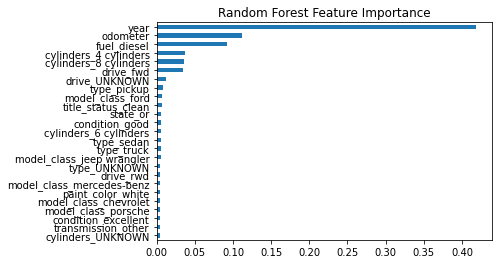

In [ ]:
pd.Series(rf.feature_importances_, index=X.columns).nlargest(25).sort_values().plot(kind='barh') 
plt.title('Random Forest Feature Importance')

# **4.Good Deal Prediction**

We use function to check if the deal is good (the predicted price should be higher than the real price).

In [ ]:
rfprediction = rf.predict(X_test)
rfdf = pd.DataFrame(rfprediction, columns = ['predict price'])
rfdf.head()

,predict price
0,35082.00
1,8336.45
2,52990.00
3,10474.81
4,1498.67


In [ ]:
def Good_Bad_Deal(model_name):
    rfdf = pd.DataFrame(rfprediction, columns = ['predict price'],index=X_test.index)
    df2 = pd.concat([X_test, rfdf], axis=1)
    df3 = df2.loc[df2[model_name] == 1]
    df4 = df3[[model_name,'predict price']]
    df5 = df4.join(df,lsuffix='_l', rsuffix='_r')
    comparison_column = np.where(df5["predict price"] > df5["price"], 'Good Deal', 'Bad Deal')
    df6 = pd.DataFrame(comparison_column, columns=['Good/Bad Deal'], index=df5.index)
    df6 = df5.join(df6)
    df6 = df6[df6['price'] > 1000]
    return df6

In [ ]:
Good_Bad_Deal('model_class_kia')

,model_class_kia_l,predict price,price,year,manufacturer,model,odometer,manu_model,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_UNKNOWN,cylinders_other,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_UNKNOWN,drive_fwd,drive_rwd,size_compact,...,model_class_honda cr-v,model_class_honda odyssey,model_class_hyundai,model_class_hyundai sonata,model_class_infiniti,model_class_jaguar,model_class_jeep,model_class_jeep grand cherokee,model_class_jeep wrangler,model_class_kia_r,model_class_lexus,model_class_lincoln,model_class_mazda,model_class_mercedes-benz,model_class_mercury,model_class_mini,model_class_mitsubishi,model_class_nissan,model_class_nissan altima,model_class_pontiac,model_class_porsche,model_class_ram,model_class_ram 1500,model_class_ram 2500,model_class_rover,model_class_saturn,model_class_subaru,model_class_subaru forester,model_class_subaru outback,model_class_tesla,model_class_toyota,model_class_toyota camry,model_class_toyota corolla,model_class_toyota prius,model_class_toyota rav4,model_class_toyota tacoma,model_class_volkswagen,model_class_volvo,price_log,Good/Bad Deal
66293,1,11450.071000,8999,2014,kia,soul basecrossover 6a,0.322975,kia soul basecrossover 6a,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.104869,Good Deal
78941,1,6344.780000,3200,2008,kia,rio,0.567671,kia rio,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.070906,Good Deal
105449,1,17842.460000,15984,2017,kia,sportage,0.449984,kia sportage,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.679344,Good Deal
172858,1,8529.790000,6500,2011,kia,optima lx,0.506336,kia optima lx,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.779557,Good Deal
196237,1,9397.350000,9251,2013,kia,soul,0.541120,kia soul,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.132487,Good Deal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22519,1,10312.190000,12988,2015,kia,optima hybrid,0.524667,kia optima hybrid,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.471781,Bad Deal
25172,1,5539.758333,3900,2009,kia,spectra ex,0.614403,kia spectra ex,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.268732,Good Deal
84923,1,36244.000000,36590,2020,kia,stinger gt sedan 4d,0.088558,kia stinger gt sedan 4d,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.507530,Bad Deal
216165,1,12076.685000,10999,2014,kia,sorento,0.456936,kia sorento,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.305560,Good Deal


In [ ]:
Good_Bad_Deal('model_class_jeep wrangler')

,model_class_jeep wrangler_l,predict price,price,year,manufacturer,model,odometer,manu_model,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_UNKNOWN,cylinders_other,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_UNKNOWN,drive_fwd,drive_rwd,size_compact,...,model_class_honda cr-v,model_class_honda odyssey,model_class_hyundai,model_class_hyundai sonata,model_class_infiniti,model_class_jaguar,model_class_jeep,model_class_jeep grand cherokee,model_class_jeep wrangler_r,model_class_kia,model_class_lexus,model_class_lincoln,model_class_mazda,model_class_mercedes-benz,model_class_mercury,model_class_mini,model_class_mitsubishi,model_class_nissan,model_class_nissan altima,model_class_pontiac,model_class_porsche,model_class_ram,model_class_ram 1500,model_class_ram 2500,model_class_rover,model_class_saturn,model_class_subaru,model_class_subaru forester,model_class_subaru outback,model_class_tesla,model_class_toyota,model_class_toyota camry,model_class_toyota corolla,model_class_toyota prius,model_class_toyota rav4,model_class_toyota tacoma,model_class_volkswagen,model_class_volvo,price_log,Good/Bad Deal
245634,1,35572.078333,36683,2017,jeep,wrangler unlimited sport,0.355711,jeep wrangler unlimited sport,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.510069,Bad Deal
215405,1,31722.000000,31590,2017,jeep,wrangler unlimited sport,0.276483,jeep wrangler unlimited sport,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.360596,Good Deal
22052,1,40514.380000,39990,2018,jeep,wrangler unlimited all new,0.198041,jeep wrangler unlimited all new,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.596385,Good Deal
44404,1,10563.820000,10800,2002,jeep,wrangler,0.628491,jeep wrangler,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.287301,Bad Deal
185489,1,16814.270000,9500,1995,jeep,wrangler,0.206156,jeep wrangler,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.159047,Good Deal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128615,1,7312.350000,8500,1997,jeep,wrangler,0.687505,jeep wrangler,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.047821,Bad Deal
233021,1,29022.873333,39998,2014,jeep,wrangler unlimited rubicon,0.421901,jeep wrangler unlimited rubicon,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.596585,Bad Deal
240005,1,9180.870000,6300,1995,jeep,wrangler,0.714144,jeep wrangler,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.748305,Good Deal
18109,1,11803.623333,12900,1998,jeep,wrangler,0.445253,jeep wrangler,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

# **5.Find Best Car**

We use function to choose the cheapest car based on the 'cars.com' dataset.

In [ ]:
def Best_Car(model_name):
    rfdf = pd.DataFrame(rfprediction, columns = ['predict price'],index=X_test.index)
    df2 = pd.concat([X_test, rfdf], axis=1)
    df3 = df2.loc[df2[model_name] == 1]
    df4 = df3[[model_name,'predict price']]
    df5 = df4.join(df,lsuffix='_l', rsuffix='_r')
    comparison_column = np.where(df5["predict price"] > df5["price"], 'Good Deal', 'Bad Deal')
    df6 = pd.DataFrame(comparison_column, columns=['Good/Bad Deal'], index=df5.index)
    df6 = df5.join(df6)
    df6 = df6[df6['price'] > 1000]
    df7 = pd.DataFrame((df6['predict price'] - df6['price'])/df6['predict price'],columns=['Cheaper Than Predict'])
    df7.style.format({
    'Cheaper Than Predict': '{:,.2%}'.format,
})
    df7 = df7.sort_values(['Cheaper Than Predict'])
    df7['Cheaper Than Predict'] = df7['Cheaper Than Predict'].astype(float).map("{:.2%}".format)
    Best_Car = df7.iloc[-1:]
    return df.loc[Best_Car.index]

In [ ]:
Best_Car('model_class_lexus')

,price,year,manufacturer,model,odometer,manu_model,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_UNKNOWN,cylinders_other,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_UNKNOWN,drive_fwd,drive_rwd,size_compact,size_full-size,size_mid-size,...,model_class_honda civic,model_class_honda cr-v,model_class_honda odyssey,model_class_hyundai,model_class_hyundai sonata,model_class_infiniti,model_class_jaguar,model_class_jeep,model_class_jeep grand cherokee,model_class_jeep wrangler,model_class_kia,model_class_lexus,model_class_lincoln,model_class_mazda,model_class_mercedes-benz,model_class_mercury,model_class_mini,model_class_mitsubishi,model_class_nissan,model_class_nissan altima,model_class_pontiac,model_class_porsche,model_class_ram,model_class_ram 1500,model_class_ram 2500,model_class_rover,model_class_saturn,model_class_subaru,model_class_subaru forester,model_class_subaru outback,model_class_tesla,model_class_toyota,model_class_toyota camry,model_class_toyota corolla,model_class_toyota prius,model_class_toyota rav4,model_class_toyota tacoma,model_class_volkswagen,model_class_volvo,price_log
66877,1200,2013,lexus,es 350,0.481402,lexus es 350,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.090077


In [ ]:
Best_Car('model_class_jeep wrangler')

,price,year,manufacturer,model,odometer,manu_model,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_UNKNOWN,cylinders_other,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_UNKNOWN,drive_fwd,drive_rwd,size_compact,size_full-size,size_mid-size,...,model_class_honda civic,model_class_honda cr-v,model_class_honda odyssey,model_class_hyundai,model_class_hyundai sonata,model_class_infiniti,model_class_jaguar,model_class_jeep,model_class_jeep grand cherokee,model_class_jeep wrangler,model_class_kia,model_class_lexus,model_class_lincoln,model_class_mazda,model_class_mercedes-benz,model_class_mercury,model_class_mini,model_class_mitsubishi,model_class_nissan,model_class_nissan altima,model_class_pontiac,model_class_porsche,model_class_ram,model_class_ram 1500,model_class_ram 2500,model_class_rover,model_class_saturn,model_class_subaru,model_class_subaru forester,model_class_subaru outback,model_class_tesla,model_class_toyota,model_class_toyota camry,model_class_toyota corolla,model_class_toyota prius,model_class_toyota rav4,model_class_toyota tacoma,model_class_volkswagen,model_class_volvo,price_log
5653,2000,2015,jeep,wrangler jku,0.001581,jeep wrangler jku,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.600902
